---

_You are currently looking at **version 1.2** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 2 - Network Connectivity

In this assignment you will go through the process of importing and analyzing an internal email communication network between employees of a mid-sized manufacturing company. 
Each node represents an employee and each directed edge between two nodes represents an individual email. The left node represents the sender and the right node represents the recipient.

In [1]:
import networkx as nx

# This line must be commented out when submitting to the autograder
!head email_network.txt

#Sender	Recipient	time
1	2	1262454010
1	3	1262454010
1	4	1262454010
1	5	1262454010
1	6	1262454010
1	7	1262454010
1	8	1262454010
1	9	1262454010
1	10	1262454010


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

df_G1 = pd.read_table('email_network.txt')
df_G1.head()

,#Sender,Recipient,time
0,1,2,1262454010
1,1,3,1262454010
2,1,4,1262454010
3,1,5,1262454010
4,1,6,1262454010


In [3]:
df_G1.dtypes

#Sender      int64
Recipient    int64
time         int64
dtype: object

In [4]:
import numpy
numpy.dtype('O')

dtype('O')

In [5]:
for col in df_G1.columns.tolist():
    df_G1[col] = df_G1[col].astype('O')

In [6]:
df_G1.dtypes

#Sender      object
Recipient    object
time         object
dtype: object

In [7]:
df_G1.head()

,#Sender,Recipient,time
0,1,2,1262454010
1,1,3,1262454010
2,1,4,1262454010
3,1,5,1262454010
4,1,6,1262454010


In [8]:
G1 = nx.from_pandas_dataframe(df_G1, '#Sender', 'Recipient', edge_attr='time')

<IPython.core.display.Javascript object>


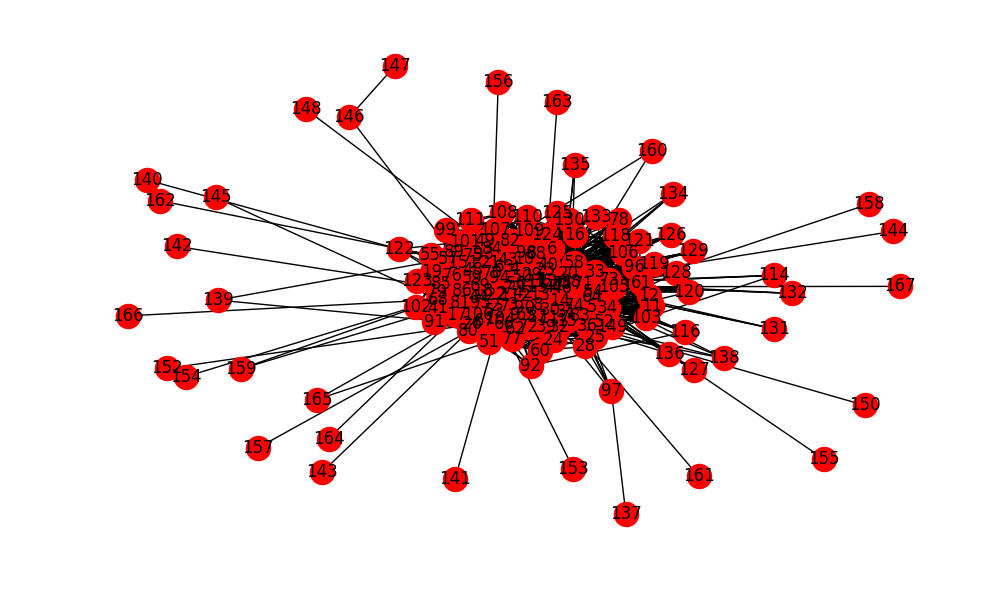

In [9]:
plt.figure(figsize=(10,6))
nx.draw_networkx(G1)
plt.axis('Off')
plt.tight_layout()

In [10]:
# See what layouts are available in networkX
[x for x in nx.__dir__() if x.endswith('_layout')]

['circular_layout',
 'random_layout',
 'shell_layout',
 'spring_layout',
 'spectral_layout',
 'fruchterman_reingold_layout']

<IPython.core.display.Javascript object>


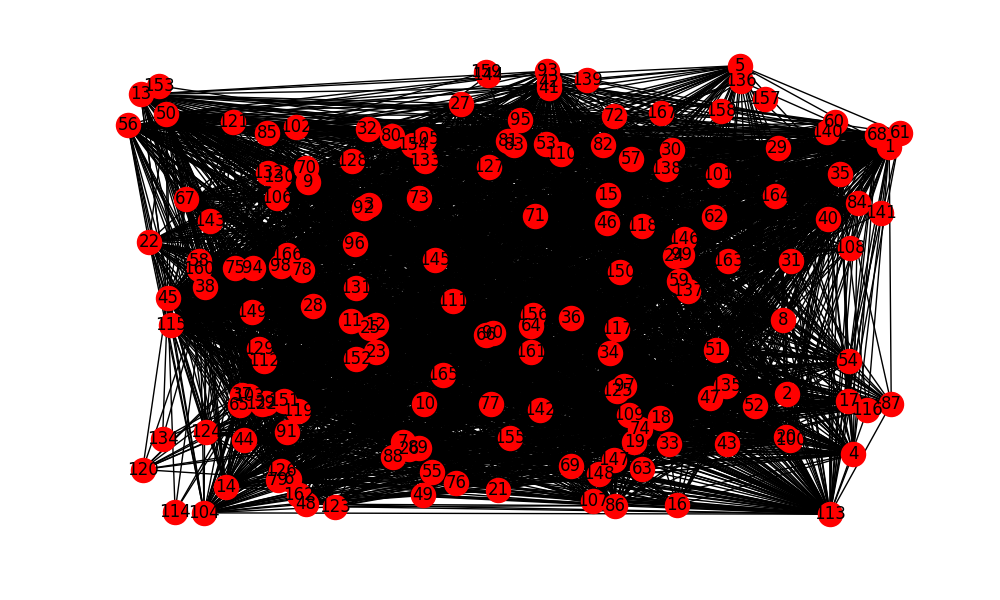

In [11]:
plt.figure(figsize=(10,6))
# position
pos = nx.random_layout(G1)
nx.draw_networkx(G1,pos)

plt.axis('Off')
plt.tight_layout()

In [12]:
G_DM = nx.MultiDiGraph(G1)

In [13]:
# change node names to String from previous type of int64
# nx.convert_node_labels_to_integers(G_DM, first_label=1)  - this will convert in inte. we need opposite
# changing the datatype to object in th einitial dataFrame didn't work.

In [14]:
x = 1
y = str(1)

In [15]:
type(y)

str

In [16]:
lab_map = {}
for x in G_DM.nodes():
    lab_map[x] = str(x)

In [17]:
G_DM_ = nx.relabel_nodes(G_DM, lab_map)

In [18]:
# G_DM_.nodes(data=True)
# all done :-)

### Question 1

Using networkx, load up the directed multigraph from `email_network.txt`. Make sure the node names are strings.

*This function should return a directed multigraph networkx graph.*

In [19]:
def answer_one():
    # Your Code Here
    import pandas as pd
    
    df_G1 = pd.read_table('email_network.txt')
    G1 = nx.from_pandas_dataframe(df_G1, '#Sender', 'Recipient')
    G_DM = nx.MultiDiGraph(G1)
    lab_map = {}
    for x in G_DM.nodes():
        lab_map[x] = str(x)
    
    return nx.relabel_nodes(G_DM, lab_map)
    # Your Answer Here

<IPython.core.display.Javascript object>


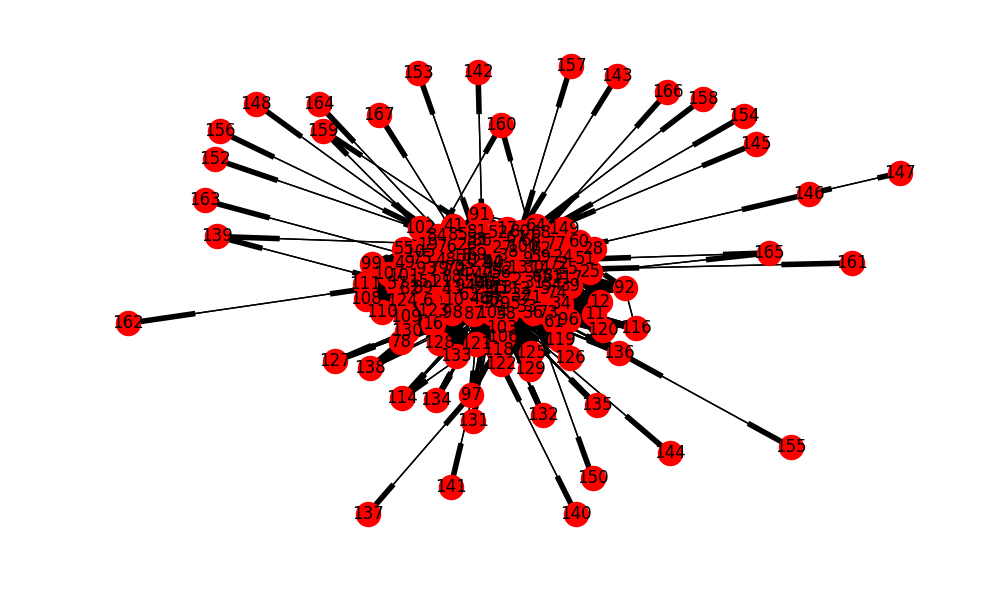

In [20]:
plt.figure(figsize=(10,6))
nx.draw_networkx(answer_one())
plt.axis('Off')
plt.tight_layout()

### Question 2

How many employees and emails are represented in the graph from Question 1?

*This function should return a tuple (#employees, #emails).*

In [21]:
G_2 = answer_one()

In [22]:
len(G_2.edges())

6501

In [23]:
def answer_two():
        
    # Your Code Here
    G_2=answer_one()
    return (len(G_2.nodes()),len(G_2.edges())) # Your Answer Here

In [24]:
answer_two()

(167, 6501)

### Question 3

* Part 1. Assume that information in this company can only be exchanged through email.

    When an employee sends an email to another employee, a communication channel has been created, allowing the sender to provide information to the receiver, but not vice versa. 

    Based on the emails sent in the data, is it possible for information to go from every employee to every other employee?


* Part 2. Now assume that a communication channel established by an email allows information to be exchanged both ways. 

    Based on the emails sent in the data, is it possible for information to go from every employee to every other employee?


*This function should return a tuple of bools (part1, part2).*

In [25]:
G_3=answer_one()

In [26]:
nx.is_strongly_connected(G_3)

True

In [27]:
nx.is_weakly_connected(G_3)

True

In [28]:
G3_un = G_3.to_undirected()
nx.is_connected(G3_un)

True

In [29]:
def answer_three():
        
    # Your Code Here
    G_3=answer_one()
    p1=nx.is_strongly_connected(G_3)
    G3_un = G_3.to_undirected()
    p2=nx.is_connected(G3_un)
    
    return (p1,p2)# Your Answer Here

In [30]:
answer_three()

(True, True)

### Question 4

How many nodes are in the largest (in terms of nodes) weakly connected component?

*This function should return an int.*

In [31]:
G = answer_one()
wccs = nx.weakly_connected_components(G)
len(max(wccs, key=len))

167

In [32]:
G_4 = answer_one()

In [33]:
sorted_comp = sorted(nx.strongly_connected_components(G_4), key=len)

In [34]:
sorted_weak_comp = sorted(nx.weakly_connected_components(G_4), key=len)

In [35]:
len(sorted_comp[0])

167

In [36]:
def answer_four():
        
    # Your Code Here
    G_4 = answer_one()
    sorted_weak_comp = sorted(nx.weakly_connected_components(G_4), key=len, reverse=True)
    return len(sorted_weak_comp[0])
    # Your Answer Here

In [37]:
answer_four()

167

### Question 5

How many nodes are in the largest (in terms of nodes) strongly connected component?

*This function should return an int*

In [38]:
def answer_five():
        
    # Your Code Here
    G_4 = answer_one()
    sorted_str_comp = sorted(nx.strongly_connected_components(G_4), key=len, reverse=True)
    return len(sorted_str_comp[0])

In [39]:
answer_five()

167

### Question 6

Using the NetworkX function strongly_connected_component_subgraphs, find the subgraph of nodes in a largest strongly connected component. 
Call this graph G_sc.

*This function should return a networkx MultiDiGraph named G_sc.*

In [40]:
# generator of graphs: use list comprehension to pull out all graphs from below G_6
G_6=nx.strongly_connected_component_subgraphs(answer_one())

In [41]:
G_6sc=max(nx.strongly_connected_component_subgraphs(answer_one()), key=len)

<IPython.core.display.Javascript object>


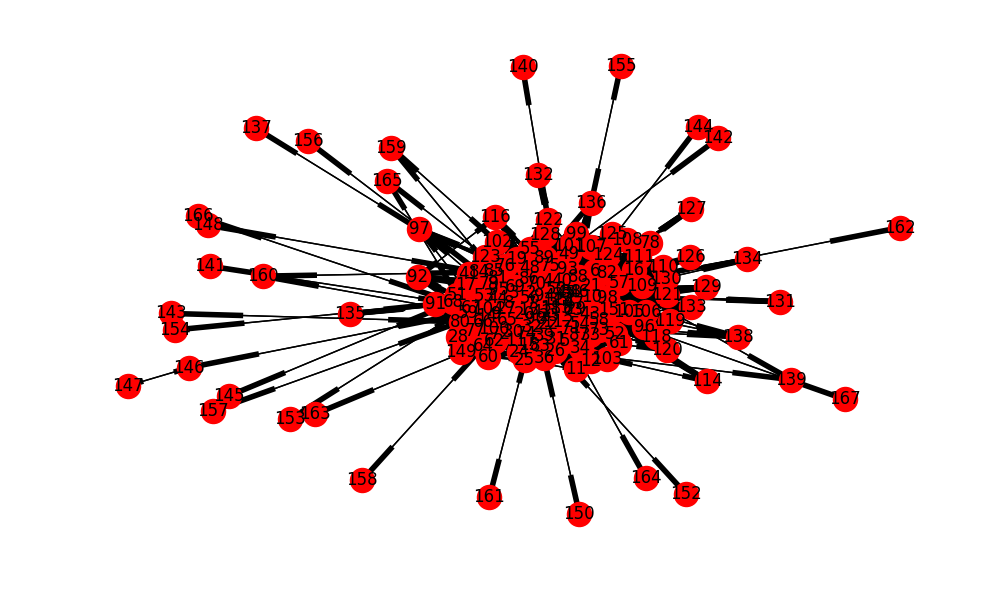

In [42]:
plt.figure(figsize=(10,6))
nx.draw_networkx(G_6sc)
plt.axis('Off')
plt.show()
plt.tight_layout()

In [43]:
def answer_six():
        
    # Your Code Here
    G_sc=max(nx.strongly_connected_component_subgraphs(answer_one()), key=len)
    
    return G_sc # Your Answer Here

### Question 7

What is the average distance between nodes in G_sc?

*This function should return a float.*

In [44]:
nx.average_shortest_path_length(answer_six())

1.9673905201644903

In [45]:
def answer_seven():
        
    # Your Code Here
    
    return nx.average_shortest_path_length(answer_six()) # Your Answer Here

### Question 8

What is the largest possible distance between two employees in G_sc?

*This function should return an int.*

In [46]:
def answer_eight():
        
    # Your Code Here
    return nx.diameter(answer_six())
    # Your Answer Here

In [47]:
answer_eight()

5

### Question 9

What is the set of nodes in G_sc with eccentricity equal to the diameter?

*This function should return a set of the node(s).*

In [48]:
set(nx.periphery(answer_six()))

{'137', '140', '147', '155', '161', '162', '163', '164'}

In [49]:
def answer_nine():
       
    # Your Code Here
#     periphery
    return set(nx.periphery(answer_six())) # Your Answer Here

### Question 10

What is the set of node(s) in G_sc with eccentricity equal to the radius?

*This function should return a set of the node(s).*

In [50]:
nx.radius(answer_six())

3

In [51]:
type(nx.center(answer_six()))

list

In [68]:
len(nx.center(answer_six()))

58

In [52]:
def answer_ten():
        
    # Your Code Here
#     centers
    return set(nx.center(answer_six()))# Your Answer Here

### Question 11

Which node in G_sc is connected to the most other nodes by a shortest path of length equal to the diameter of G_sc?

How many nodes are connected to this node?


*This function should return a tuple (name of node, number of satisfied connected nodes).*

In [53]:
G_11=answer_six()

In [54]:
p_nodes = nx.periphery(G_11)
p_nodes

['163', '140', '161', '164', '137', '162', '155', '147']

In [55]:
s_path=nx.shortest_path_length(G_11,'163')
# dictionary of nades and their path lenths with the node passed above with graph

In [62]:
dia = nx.diameter(G_11)
max_nodes=0
for node in p_nodes:
    count=0
    for n, d in nx.shortest_path_length(G_11,node).items():
        if d==dia:
            count+=1
    if count > max_nodes:
        n_node=node
        max_nodes=count
answer=(n_node,max_nodes)
print(answer)

('147', 7)


In [69]:
def answer_eleven():
        
    # Your Code Here
    G_11=answer_six()
    p_nodes = nx.periphery(G_11)
    dia = nx.diameter(G_11)
    max_nodes=0
    n_node=''
    for node in p_nodes:
        count=0
        for n, d in nx.shortest_path_length(G_11,node).items():
            if d==dia:
                count+=1
        if count > max_nodes:
            n_node=node
            max_nodes=count
    answer=(n_node,max_nodes)
    return answer# Your Answer Here

In [70]:
answer_eleven()

('147', 7)

### Question 12

Suppose you want to prevent communication from flowing to the node that you found in the previous question from any node in the center of G_sc, what is the smallest number of nodes you would need to remove from the graph (you're not allowed to remove the node from the previous question or the center nodes)? 

*This function should return an integer.*

In [76]:
G12=answer_six()
node1=answer_eleven()[0]
center_nodes=nx.center(G12)

In [87]:
node_cut_list=[]
for node_ in center_nodes:
    node_cut_list.append(nx.minimum_node_cut(G12,node1,node_))

In [88]:
unq_list=[]
for item in node_cut_list:
    if item not in unq_list:
        unq_list.append(item)
unq_list

[{'59'}, {'146'}]

In [86]:
node_cut_list=[]
for node_ in center_nodes:
    remove=nx.minimum_node_cut(G12,node1,node_)
    if remove not in node_cut_list:
        node_cut_list.append(remove)
node_cut_list

[{'59'}, {'146'}]

In [93]:
def answer_twelve():
        
    # Your Code Here
    G12=answer_six()
    node1=answer_eleven()[0]
    center_nodes=nx.center(G12)
    node_cut_list=[]
    for node_ in center_nodes:
        remove=nx.minimum_node_cut(G12,node1,node_)
        if ((remove not in node_cut_list) and (remove not in center_nodes)):
            node_cut_list.append(remove)
    
    return len(node_cut_list)# Your Answer Here

In [94]:
answer_twelve()

2

### Question 13

Construct an undirected graph G_un using G_sc (you can ignore the attributes).

*This function should return a networkx Graph.*

In [96]:
nx.is_strongly_connected(G12)

True

In [97]:
nx.is_weakly_connected(G12)

True

In [100]:
G_un13=G12.to_undirected()

In [103]:
G_un13

In [105]:
nx.Graph(G_un13)

In [106]:
def answer_thirteen():
        
    # Your Code Here
    G_un=answer_six().to_undirected()
    
    return nx.Graph(G_un)# Your Answer Here

In [107]:
answer_thirteen()

### Question 14

What is the transitivity and average clustering coefficient of graph G_un?

*This function should return a tuple (transitivity, avg clustering).*

In [112]:
def answer_fourteen():
        
    # Your Code Here
    G_un=answer_thirteen()
    trvt=nx.transitivity(G_un)
    avg_cl_coeff=nx.average_clustering(G_un)
    
    return (trvt,avg_cl_coeff)# Your Answer Here

In [113]:
answer_fourteen()

(0.5412664316573972, 0.5918632085486947)